In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn.functional as F

## Batch Normalization

In [4]:
m = nn.BatchNorm1d(3)
input = torch.tensor([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9],
                      [10, 11, 12]], dtype=torch.float)
output = m(input)
print(input)
print(output)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
tensor([[-0.8409, -0.2090, -1.3279],
        [-0.2803, -0.0697, -0.4426],
        [ 0.2803,  0.0697,  0.4426],
        [ 0.8409,  0.2090,  1.3279]], grad_fn=<NativeBatchNormBackward>)


## Dropout

In [5]:
m = nn.Dropout(p=0.2)
input = torch.tensor([[1, 2, 3],
                      [4, 5, 6],
                      [7, 8, 9],
                      [10, 11, 12]], dtype=torch.float)
output = m(input)
print(input)
print(output)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
tensor([[ 0.0000,  2.5000,  3.7500],
        [ 5.0000,  6.2500,  7.5000],
        [ 8.7500, 10.0000, 11.2500],
        [12.5000,  0.0000,  0.0000]])


## Linear Regression Example using Neural Network

#### Generate Data

In [6]:
x = 20 * torch.rand(100) - 10
y = (2 * x) + 5
noise_ratio = 0.2 * torch.rand(100) - 0.1
y_range = torch.max(y) - torch.min(y)
noise = noise_ratio * y_range
y = y + noise
print(x.size())
print(y.size())

torch.Size([100])
torch.Size([100])


#### Plot Data

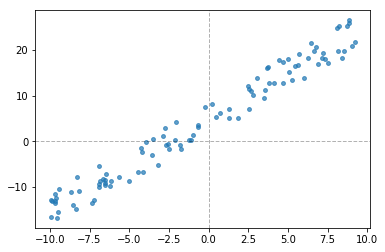

In [7]:
plt.scatter(x.numpy(), y.numpy(), alpha=0.7, s=15)
plt.axhline(0, color="black", linestyle="--", alpha=0.3, linewidth=1)
plt.axvline(0, color="black", linestyle="--", alpha=0.3, linewidth=1)
plt.show()

#### Build Neural Network Architecture

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 5, bias=True)
        self.fc2 = nn.Linear(5, 1, bias=True)
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm = nn.BatchNorm1d(5)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.batchnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#### Initialize Neural Network

In [9]:
net = Net()

#### Training Loop

In [11]:
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001)
#tranining loop
net.train()
for i in range(0, 100000):
    optimizer.zero_grad()
    output = net(x.resize_(100, 1))
    #print(output)
    loss = criterion(output, y.resize_(100, 1))
    if i%10000 == 0:
        print("mseloss:", loss.item())
        #print(list(net.parameters()))
    loss.backward()
    optimizer.step()

mseloss: 177.4246826171875
mseloss: 20.05832862854004
mseloss: 29.772899627685547
mseloss: 24.729372024536133
mseloss: 21.321701049804688
mseloss: 24.73200798034668
mseloss: 24.66257095336914
mseloss: 16.844985961914062
mseloss: 32.568424224853516
mseloss: 20.81440544128418


#### Evaluate Model

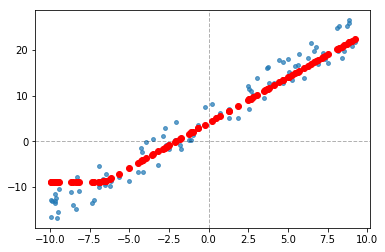

In [28]:
net.eval()
plt.scatter(x.numpy().reshape(100), y.numpy().reshape(100), alpha=0.7, s=15)
plt.axhline(0, color="black", linestyle="--", alpha=0.3, linewidth=1)
plt.axvline(0, color="black", linestyle="--", alpha=0.3, linewidth=1)
x_pred = np.linspace(-10, 10, 100)
output = net(x.resize_(100, 1))
plt.plot(x.numpy().reshape(100), output.detach().numpy().reshape(100), "ro")
plt.show()